In [54]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [59]:


# Hämta från databasen
conn = sqlite3.connect("matkassen_data.db")
df_final = pd.read_sql("SELECT * FROM processed_data", conn)
conn.close()


In [61]:
print(df_final["kassatyp"].unique())
# Analysera distributionen av kassatyp

<StringArray>
[       'Klassisk',          'Familj',      'Vegetarisk',   'Snabb & Enkel',
        'KLASSISK',      'Vegetarian',   'klassiskkasse',          'Family',
           'Quick',         'Express',   'Snabb & enkel',        'Standard',
          'FAMILJ',          'Veggie',    'familjekasse',         'Classic',
    'expresskasse',   'Familjekassen',             'Veg',      'VEGETARISK',
 'vegetariskkasse',           'Veggo',           'Vegan', 'Snabb och enkel',
      'Vegeterian',     'Snabb&Enkel',        'Familjen',       'Klassiker',
    'Familjekasse']
Length: 29, dtype: str


In [62]:
# Före din befintliga KPI-kod:
print("Antal rader per kassetyp innan dropna():")
print(df_final.groupby('kassatyp').size())

df_temp = df_final.dropna(subset=['feat_sentiment_index'])

print("\nAntal rader per kassetyp EFTER dropna():")
print(df_temp.groupby('kassatyp').size())

Antal rader per kassetyp innan dropna():
kassatyp
Classic              50
Express              12
FAMILJ               21
Familj              602
Familjekasse          2
Familjekassen        22
Familjen              6
Family               36
KLASSISK             54
Klassiker             4
Klassisk           1134
Quick                13
Snabb & Enkel       367
Snabb & enkel        12
Snabb och enkel       3
Snabb&Enkel           4
Standard             69
VEGETARISK           23
Veg                  18
Vegan                 8
Vegetarian           18
Vegetarisk          612
Vegeterian            8
Veggie               24
Veggo                 6
expresskasse         29
familjekasse         16
klassiskkasse        53
vegetariskkasse      17
dtype: int64

Antal rader per kassetyp EFTER dropna():
Series([], dtype: int64)


Antal rader per kassetyp innan dropna():
kassatyp
Classic              50
Express              12
FAMILJ               21
Familj              602
Familjekasse          2
Familjekassen        22
Familjen              6
Family               36
KLASSISK             54
Klassiker             4
Klassisk           1134
Quick                13
Snabb & Enkel       367
Snabb & enkel        12
Snabb och enkel       3
Snabb&Enkel           4
Standard             69
VEGETARISK           23
Veg                  18
Vegan                 8
Vegetarian           18
Vegetarisk          612
Vegeterian            8
Veggie               24
Veggo                 6
expresskasse         29
familjekasse         16
klassiskkasse        53
vegetariskkasse      17
dtype: int64

Antal rader per kassetyp EFTER dropna():
Series([], dtype: int64)
------------------------------

De faktiska medelvärdena för sentiment:
Series([], Name: feat_sentiment_index, dtype: object)


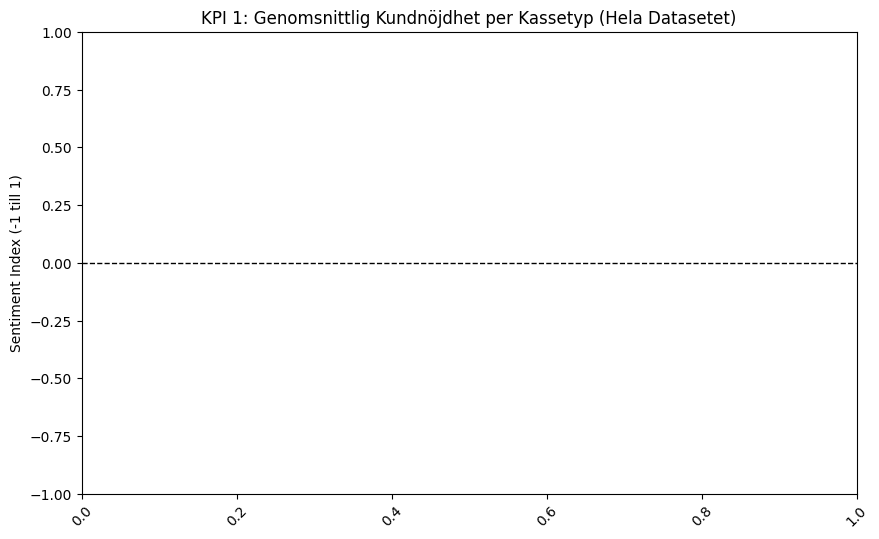

In [63]:
print("Antal rader per kassetyp innan dropna():")
print(df_final.groupby('kassatyp').size())

# Denna rad skapar en tillfällig, ren DataFrame:
df_temp_filtered = df_final.dropna(subset=['feat_sentiment_index'])

# Inspektera datamängden EFTER filtrering:
print("\nAntal rader per kassetyp EFTER dropna():")
print(df_temp_filtered.groupby('kassatyp').size())
print("-" * 30) # En separator för tydlighet
# Vi lägger till .dropna() för att vara säkra på att vi bara räknar rader med sentiment.
sentiment_kpi = df_final.dropna(subset=['feat_sentiment_index']).groupby('kassatyp')['feat_sentiment_index'].mean().sort_values(ascending=False)
print("\nDe faktiska medelvärdena för sentiment:")
print(sentiment_kpi)
# 2. Visualisering
plt.figure(figsize=(10, 6))

#  Vi lägger till'hue' för att undvika varningar i nyare Seaborn.
sns.barplot(
    x=sentiment_kpi.index, 
    y=sentiment_kpi.values, 
    palette="viridis", 
    hue=sentiment_kpi.index, 
    legend=False
)

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.ylim(-1, 1) # Sätter skalan för att visa hela spannet -1 till 1
plt.title("KPI 1: Genomsnittlig Kundnöjdhet per Kassetyp (Hela Datasetet)")
plt.ylabel("Sentiment Index (-1 till 1)")
plt.xticks(rotation=45) # Gör det lättare att läsa kassetyp-namnen
plt.show()

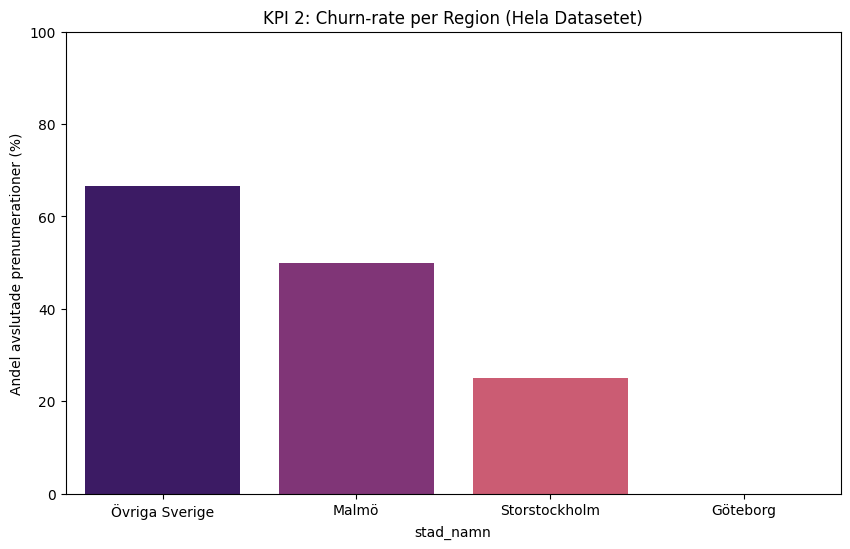

--- CHURN PER REGION (%) ---
stad_namn
Övriga Sverige    66.666667
Malmö             50.000000
Storstockholm     25.000000
Göteborg           0.000000
Name: har_avslutat, dtype: float64


In [41]:

# Vi räknar ut medelvärdet av 'har_avslutat' (0 eller 1) vilket ger andelen churn
churn_kpi = df_final.groupby('stad_namn')['har_avslutat'].mean().sort_values(ascending=False) * 100

# 2. Visualisering
plt.figure(figsize=(10, 6))
#  Vi lägger till hue för att undvika varningar
sns.barplot(x=churn_kpi.index, y=churn_kpi.values, palette="magma", hue=churn_kpi.index, legend=False)

plt.title("KPI 2: Churn-rate per Region (Hela Datasetet)")
plt.ylabel("Andel avslutade prenumerationer (%)")
plt.ylim(0, 100) # Sätter skalan till 0-100% för tydlighet
plt.show()

print("--- CHURN PER REGION (%) ---")
print(churn_kpi)

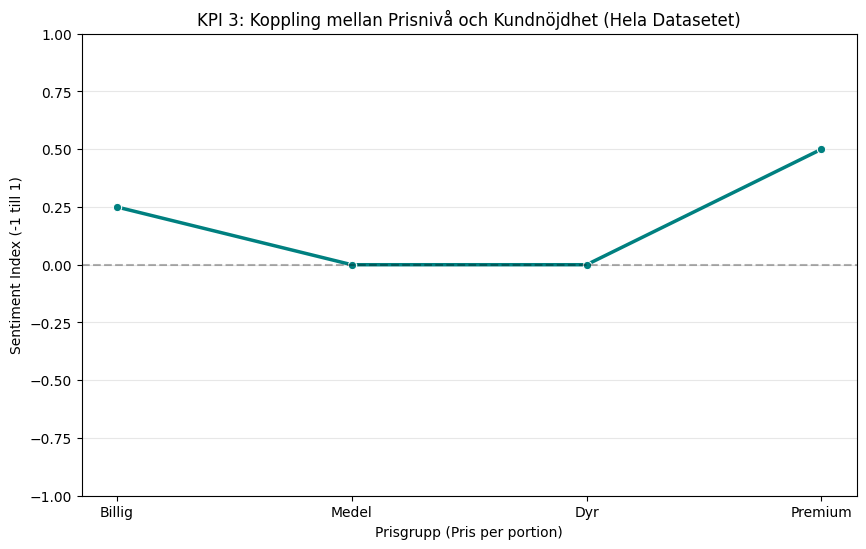

--- SNITTPRERENTIMENT PER PRISGRUPP ---
pris_grupp
Billig     0.25
Medel      0.00
Dyr        0.00
Premium    0.50
Name: feat_sentiment_index, dtype: float64


In [42]:
# 1. Använd df_final och rensa bort rader utan pris/sentiment för en korrekt analys
df_analysis = df_final.dropna(subset=['pris_per_portion', 'feat_sentiment_index']).copy()

# 2. Delar upp priset i grupper baserat på hela datasetet
# q=4 delar upp kunderna i fyra lika stora grupper (kvartiler)
df_analysis['pris_grupp'] = pd.qcut(df_analysis['pris_per_portion'], q=4, labels=['Billig', 'Medel', 'Dyr', 'Premium'])

# 3. Beräkna genomsnittligt sentiment per prisgrupp
price_sentiment = df_analysis.groupby('pris_grupp')['feat_sentiment_index'].mean()

# 4. Visualisering
plt.figure(figsize=(10, 6))
sns.lineplot(x=price_sentiment.index, y=price_sentiment.values, marker='o', color='teal', linewidth=2.5)

# Förtydliga grafen
plt.axhline(0, color='black', linestyle='--', alpha=0.3)
plt.ylim(-1, 1) 
plt.title("KPI 3: Koppling mellan Prisnivå och Kundnöjdhet (Hela Datasetet)")
plt.ylabel("Sentiment Index (-1 till 1)")
plt.xlabel("Prisgrupp (Pris per portion)")
plt.grid(axis='y', alpha=0.3)
plt.show()

print("--- SNITTPRERENTIMENT PER PRISGRUPP ---")
print(price_sentiment)

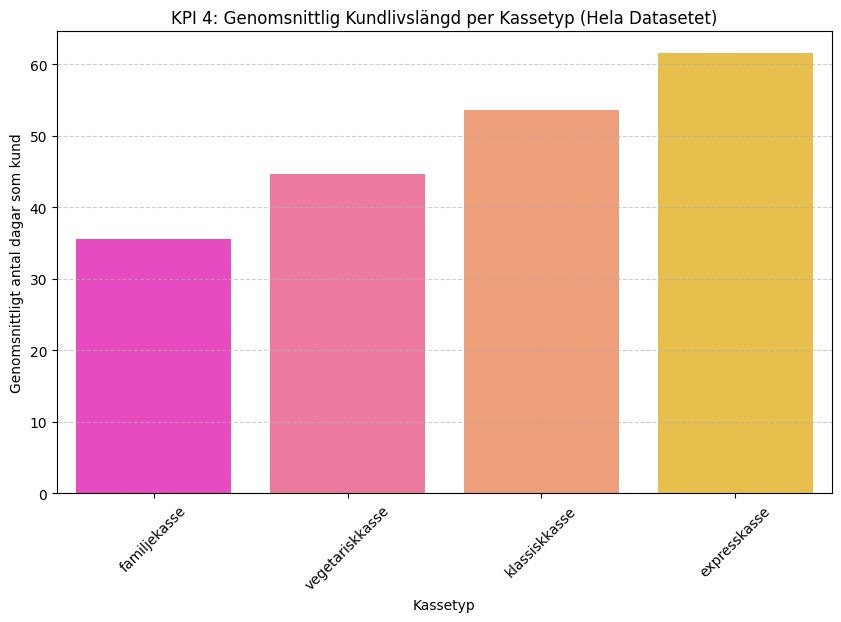

--- GENOMSNITTLIG LOJALITET (DAGAR) ---
kassatyp
familjekasse       35.5
vegetariskkasse    44.7
klassiskkasse      53.6
expresskasse       61.5
Name: feat_kundalder_dagar, dtype: float64


In [43]:
# 1. Använder df_final för hela datasetet
# Vi filtrerar så vi bara ser kunder med en ålder på 0 dagar eller mer
lojalitet_kpi = df_final[df_final['feat_kundalder_dagar'] >= 0].groupby('kassatyp')['feat_kundalder_dagar'].mean().sort_values()

# 2. Visualisering
plt.figure(figsize=(10, 6))

sns.barplot(
    x=lojalitet_kpi.index, 
    y=lojalitet_kpi.values, 
    palette="spring", 
    hue=lojalitet_kpi.index, 
    legend=False
)

plt.title("KPI 4: Genomsnittlig Kundlivslängd per Kassetyp (Hela Datasetet)")
plt.ylabel("Genomsnittligt antal dagar som kund")
plt.xlabel("Kassetyp")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

print("--- GENOMSNITTLIG LOJALITET (DAGAR) ---")
print(lojalitet_kpi.round(1))

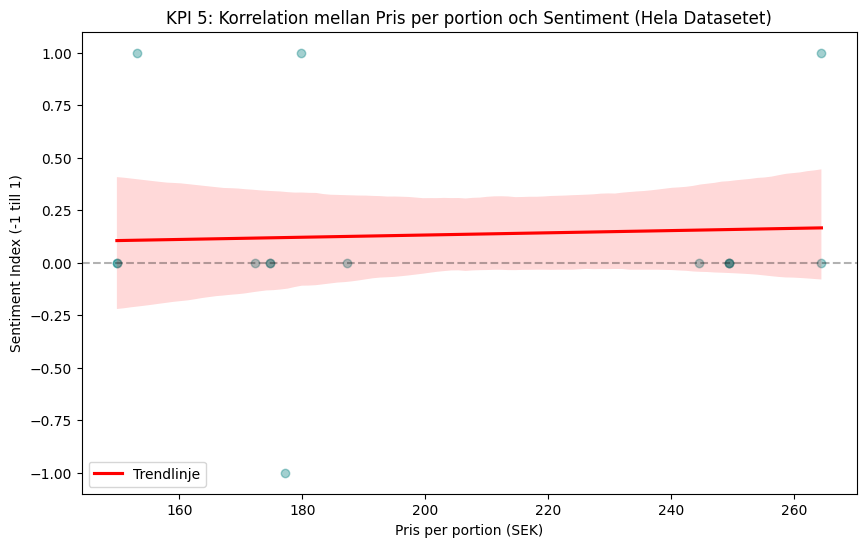

Statistisk korrelation (Pearson): 0.0456


In [44]:
# 1. Använd df_final och ta bort rader där pris eller sentiment saknas
# Detta säkerställer att regplot kan räkna ut korrelationslinjen korrekt
df_plot = df_final.dropna(subset=['pris_per_portion', 'feat_sentiment_index'])

# 2. Visualisering
plt.figure(figsize=(10, 6))

# sns.regplot ritar både punkterna (scatter) och en röd trendlinje (regression)
sns.regplot(
    data=df_plot, 
    x='pris_per_portion', 
    y='feat_sentiment_index', 
    scatter_kws={'alpha':0.2, 'color':'teal'}, # Lägre alpha gör det lättare att se densitet
    line_kws={'color':'red', 'label':'Trendlinje'}
)

plt.axhline(0, color='black', linestyle='--', alpha=0.3)
plt.ylim(-1.1, 1.1)
plt.title("KPI 5: Korrelation mellan Pris per portion och Sentiment (Hela Datasetet)")
plt.ylabel("Sentiment Index (-1 till 1)")
plt.xlabel("Pris per portion (SEK)")
plt.legend()
plt.show()

# 3. Räknar ut det faktiska korrelationsvärdet.
correlation = df_plot['pris_per_portion'].corr(df_plot['feat_sentiment_index'])
print(f"Statistisk korrelation (Pearson): {correlation:.4f}")

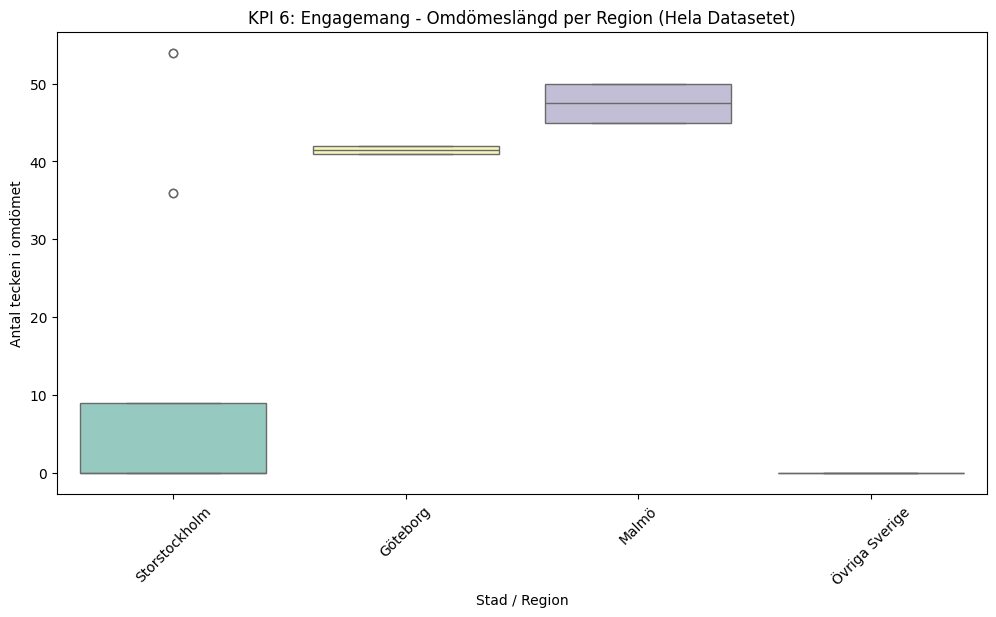

--- GENOMSNITTLIG TEXTLÄNGD PER STAD ---
stad_namn
Malmö             47.50
Göteborg          41.50
Storstockholm     11.25
Övriga Sverige     0.00
Name: omdome_langd, dtype: float64


In [45]:
# 1. Använd df_final för hela datasetet
# Vi filtrerar bort de som inte skrivit något alls om vi vill se den faktiska skrivlängden
df_skrivande = df_final[df_final['omdome_langd'] > 0]

# 2. Visualisering
plt.figure(figsize=(12, 6))

# Boxplot visar median, kvartiler och extremvärden
sns.boxplot(
    data=df_final, 
    x='stad_namn', 
    y='omdome_langd', 
    palette="Set3",
    hue='stad_namn',
    legend=False
)

plt.title("KPI 6: Engagemang - Omdömeslängd per Region (Hela Datasetet)")
plt.ylabel("Antal tecken i omdömet")
plt.xlabel("Stad / Region")
plt.xticks(rotation=45)

# Vi begränsar y-axeln något om det finns extrema outliers som förstör skalan
# plt.ylim(0, df_final['omdome_langd'].quantile(0.95)) 

plt.show()

# Beräkna snittet för utskrift
print("--- GENOMSNITTLIG TEXTLÄNGD PER STAD ---")
print(df_final.groupby('stad_namn')['omdome_langd'].mean().sort_values(ascending=False))

--- KPI: Engagemang (längd omdöme) vs. Churn (Hela Datasetet) ---
har_avslutat
Kvarvarande    16.9
Avslutade      19.8
Name: omdome_langd, dtype: float64


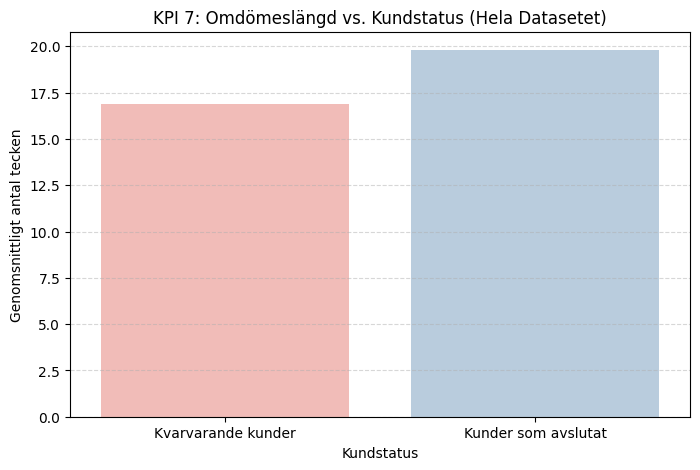

In [46]:
# 1. Använd df_final för att inkludera hela den städade kundbasen
# Vi beräknar snittet på omdömeslängden grupperat på churn-status (0 eller 1)
engagement_churn_kpi = df_final.groupby('har_avslutat')['omdome_langd'].mean()

print("--- KPI: Engagemang (längd omdöme) vs. Churn (Hela Datasetet) ---")
# Vi mappar index för utskriften så det blir tydligt
print(engagement_churn_kpi.rename(index={0: "Kvarvarande", 1: "Avslutade"}))

# 2. Visualisering
plt.figure(figsize=(8, 5))

# Vi skapar grafen
sns.barplot(
    x=engagement_churn_kpi.index, 
    y=engagement_churn_kpi.values, 
    palette="Pastel1",
    hue=engagement_churn_kpi.index,
    legend=False
)

# Snyggar till axlar och titlar
plt.title("KPI 7: Omdömeslängd vs. Kundstatus (Hela Datasetet)")
plt.xlabel("Kundstatus")
plt.ylabel("Genomsnittligt antal tecken")
plt.xticks(ticks=[0, 1], labels=["Kvarvarande kunder", "Kunder som avslutat"])

# Lägg till ett rutnät för att lättare läsa av värdena
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [19]:
#Aggregarad Sentiment KPI
overall_sentiment_kpi = np.nanmean(df_final['feat_sentiment_index'])

# Skriv ut resultatet formaterat till 3 decimaler
print(f"--- ALLMÄNT OMDÖME FÖR HELA DATASETET ---")
print(f"Genomsnittligt Sentiment Index: {overall_sentiment_kpi:.3f}")

--- ALLMÄNT OMDÖME FÖR HELA DATASETET ---
Genomsnittligt Sentiment Index: 0.133
